In [1]:
%load_ext autoreload
%autoreload 2

In [49]:
import shap
import random
import datetime
import numpy as np
import pandas as pd  
import seaborn as sns
from sklearn.svm import SVC
from math import floor, ceil
import seaborn as sns  # for prettier plots
import matplotlib.style as style
import matplotlib.pyplot as plt
import mplfinance as fplt
import matplotlib.dates as mdates
from itertools import combinations
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import silhouette_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.metrics import plot_confusion_matrix, classification_report, plot_precision_recall_curve
from sklearn.model_selection import train_test_split, GridSearchCV, train_test_split, cross_val_score, StratifiedKFold

from datetime import datetime
from matplotlib.dates import date2num
from collections import namedtuple
from neuralprophet import NeuralProphet, set_log_level
set_log_level("ERROR")

In [3]:
plt.style.use('fivethirtyeight')
plt.rcParams.update({'figure.figsize': (12, 6)})

In [36]:
# Formatting crap data
# df = pd.read_csv('../data/WIN$NM5_FORMATTED.csv', sep=',', header=0, names=['raw'])#header=0, names=['data', 'open', 'high', 'low', 'close'])
# df[['data', 'open', 'high', 'low', 'close']] = df.raw.str.split(',', expand=True)[range(0, 5)]
# df[['data', 'open', 'high', 'low', 'close']].to_csv('../data/WIN$NM5_DF.csv', index=False)

In [4]:
df = pd.read_csv('../data/WIN$NM5_DF.csv', parse_dates=['Date'], header=0, names=['Date', 'Open', 'High', 'Low', 'Close'])

In [5]:
df.index = df.Date

In [15]:
df_tkp_stp = df[['Open']].copy()

In [128]:
def take_profit_stop_loss_perc(x, tkp=.02, stp=.01):
    return [x*(1+tkp), x*(1-stp)]

def take_profit_stop_loss_abs(x, tkp=20, stp=10):
    return [x + tkp, x -stp]

In [129]:
take_profit_stop_loss_abs(df[df.index=='2021-02-02 16:50:00'].Open.values[0]), df[df.index=='2021-02-02 16:50:00'].Open.values[0]

([118385.0, 118355.0], 118365.0)

In [130]:
tick_size = 5

In [115]:
df_sample = df[df.Date.between('2021-02-02 16:00:00', '2021-02-02 18:00:00')].copy()

In [123]:
df_sample = (df_sample[df_sample.columns.difference(['Date'])] - df_sample.Low.min())/tick_size

In [147]:
tkp_stp = take_profit_stop_loss_abs(df_sample[df_sample.index=='2021-02-02 16:50:00'].Open.values[0], tkp=120, stp=50)
tkp_stp = tkp_stp + df_sample[df_sample.index=='2021-02-02 16:50:00'].Open.values.tolist()
tkp_stp

[230.0, 60.0, 110.0]

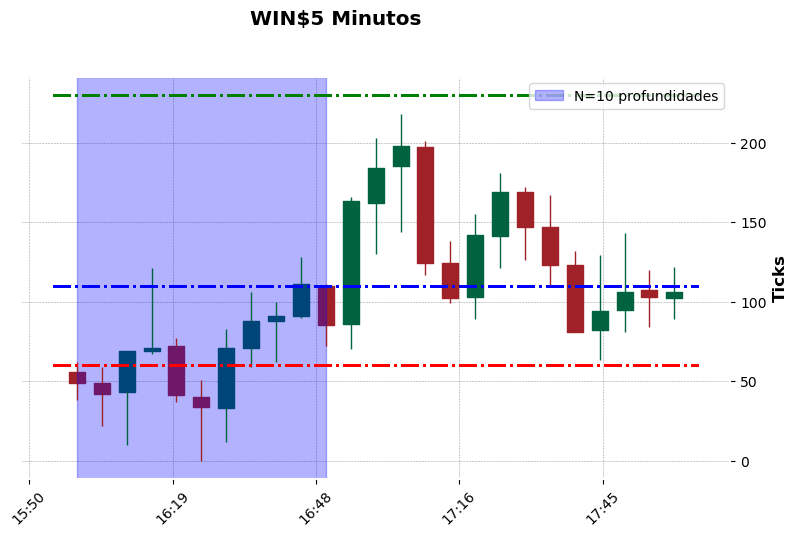

In [148]:
#apd  = fplt.make_addplot(df_tkp_stp[df_tkp_stp.Date.between('2021-02-10 10:00:00', '2021-02-10 14:00:00')][['Take_Profit', 'Stop_Loss']])
fig, axes = fplt.plot(
            df_sample,
            type='candle',
            style='charles',
            title='WIN$5 Minutos',
            ylabel='Ticks',
            figratio=(12,7),
            #addplot=apd,
            returnfig=True,
            show_nontrading=True,
            hlines=dict(hlines=tkp_stp, colors=['g','r', 'b'], linestyle='-.')
            )

axes[0].axvspan(date2num(datetime.fromisoformat('2021-02-02 16:00:00')), date2num(datetime.fromisoformat('2021-02-02 16:50:00')), 
          label="N=10 profundidades",color="b", alpha=0.3)
axes[0].legend()